# Projeto E-Commerce: Identificar os perfis dos consumidores

### Tarefa: Segmente usuários com base em seus perfis de consumidor

#### Objetivo: Segmentar os usuários com base no histórico de compras, para desenvolver recomendações para a equipe de marketing sobre ofertas mais personalizadas para diferentes perfis

[Link compartilhavel Google Drive](https://drive.google.com/drive/folders/1FU2VvXT-Kmf-DjYhdCgjAF6xEdQvD8Sm?usp=drive_link)

#### 1. Importando bibliotecas

In [21]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 
sns.set_palette("viridis")
sns.set_context('notebook')
import datetime as dt 
import sweetviz as sv 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from yellowbrick.cluster.elbow import kelbow_visualizer
import scipy.stats as stats
from itertools import combinations

import warnings
warnings.filterwarnings("ignore")

#### 2. Leitura dos dados, revisão bibliográfica sobre o tema e descrição do conjunto

In [22]:
df = pd.read_csv('ecommerce_dataset_us.csv', sep='\t')

In [23]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0


##### Descrição dos dados:

<details>
  <summary>Clique para expandir</summary>
  
- `InvoiceNo` — identificador de pedido
- `StockCode` — identificador de item
- `Description` — nome de item
- `Quantity` - quantidade de itens 
- `InvoiceDate` — data do pedido
- `UnitPrice` — preço por item
- `CustomerID` - identificador do cliente
</details>



##### Revisão bibliográficas e abordagem sobre o tema:

<details>
  <summary>Clique para expandir</summary>

* Segmentação de clientes: guia completo:
Este guia detalha como a segmentação de clientes auxilia equipes de marketing e vendas a prever metas futuras com maior precisão, permitindo um planejamento mais eficaz de campanhas. [MONDAY.COM](https://monday.com/blog/pt/vendas-crm/segmentacao-de-clientes-para-vendas-e-marketing-b2b/?utm_source=chatgpt.com)

* Segmentação do Ciclo de Vida do Cliente para E-commerce:
O artigo aborda o processo de agrupar clientes com base em sua posição no relacionamento com a empresa, permitindo personalizar interações e melhorar a experiência do cliente. [CICLO E-COMMERCE](https://cicloecommerce.com.br/segmentacao-do-ciclo-de-vida-do-cliente-para-e-commerce/?utm_source=chatgpt.com)

* Segmentação de Clientes usando K-Means Clustering:
Este artigo no Medium explora como o clustering K-Means pode ser utilizado para segmentar clientes com base em seus comportamentos de compra, oferecendo uma visão prática da aplicação desse algoritmo. 
[MEDIUM](https://medium.com/%40larixgomex/segmenta%C3%A7%C3%A3o-de-clientes-usando-k-means-clustering-739ca0168e2b)

* Segmentação de Clientes com K-Means
Neste artigo do LinkedIn, o autor compartilha sua experiência em um projeto de segmentação de clientes, utilizando a análise RFM e o algoritmo K-Means, destacando insights e resultados obtidos. 
[LINKEDIN](https://www.linkedin.com/pulse/segmenta%C3%A7%C3%A3o-de-clientes-com-k-means-estevao-smith-trmqf/)

* Qual o melhor grupo de clientes? — RFM Análise (K-Means + EDA)
Este artigo da Dataside aborda a análise RFM combinada com o K-Means e a Análise Exploratória de Dados (EDA), discutindo como identificar os melhores grupos de clientes para estratégias de marketing mais eficazes. 
[DATASIDE](https://www.dataside.com.br/dataside-community/a-i-e-machine-learning/qual-o-melhor-grupo-de-clientes-rfm-analise-k-means-eda?utm_source=chatgpt.com)

* Segmentação de Clientes com RFM em Python
Este artigo no Medium detalha como implementar a análise RFM utilizando Python, oferecendo um guia passo a passo para segmentar clientes com base em seu comportamento de compra. 
[MEDIUM](https://medium.com/%40larixgomex/segmenta%C3%A7%C3%A3o-de-clientes-com-rfm-em-python-3a97e534ffa1)

* Segmentação de Clientes: conheça a análise RFM
Neste artigo do LinkedIn, o autor introduz a análise RFM como uma técnica para segmentar clientes, discutindo sua importância e aplicação no mercado de varejo. 
[LINKEDIN](https://www.linkedin.com/pulse/segmenta%C3%A7%C3%A3o-de-clientes-conhe%C3%A7a-an%C3%A1lise-rfm-fabio-innocente-alves/)
</details>



##### Idéia de abordagem sobre o projeto:

<details>
  <summary>Clique para expandir</summary>
  
Baseado na revisão bibliográfica o plano seria:

* Análise RFM primeiro:
    + Calcular as métricas RFM (Recência, Frequência e Valor Monetário) para cada cliente, essa é uma forma de segmentação da base de clientes com base em quão engajados com o seu negócio eles estão.
    + Normalizar os valores para que fiquem na mesma escala.
    + Analisar distribuições e possíveis outliers.

* Aplicação do K-Means depois:
    + Utilizar os scores RFM como variáveis para o modelo de clusterização.
    + Escolher o número ideal de clusters (usando o método Ward, metodo cotovelo).
    + Analisar e Interpretar os clusters e validar se fazem sentido para o negócio (Distribuição e ou Silhouette score).
    + Dessa forma, o K-Means consegueria identificar diferentes segmentos de consumidores com base em seus comportamentos de compra, permitindo insights mais precisos para estratégias de marketing.
</details>



##### Resultados esperados:

<details>
  <summary>Clique para expandir</summary>
  
* Após verificar o valor médio do RFM por cluster:
    + Clientes principais ou clientes Vips: clientes com carteira aberta, muito valor monetário e que compram frequentemente (fidelização e upselling)
    + Clientes casuais, regulares ou ocasionais: clientes que compram com boa frequencia mas com baixo valor monetário (aumento de gasto por transação, importantes pro volumes de vendas)
    + Clientes esporádicos ou perdidos: clientes que aparecem raramente e não se ouvem mais falar, podem também ser clientes com baixo valor monetário(desconto segunda ou terceira compra, medidas para cativá-los)

* Perguntas que podem ser respondidas após análise de perfis: 
    + Por que isso é importante? O que podemos obter com isso?
    + Quem são seus melhores clientes?
    + Quais dos seus clientes podem contribuir para o churn?
    + Quem tem o potencial de se tornar um cliente valioso?
    + Quais dos nossos clientes podem ser retidos?
    + Quais dos nossos clientes têm mais probabilidade de responder às campanhas de engajamento?
    + Quais tipos de campanhas de engajamentos podemos oferecer para cada cluster?
</details>




#### 3. Análise de qualidade e limpeza dos dados

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


* Colunas fora do formato snake_case 
* Há valores ausentes principalmente na coluna customerid 
* Colunas 'invoicedate' e 'customerid' fora do formato adequado 

##### Nome das colunas 

In [25]:
#function columns to snake_case
def new_col_names(df):
    new_names = []
    for old_name in df.columns:
        name_stripped = old_name.strip()
        name_lowered = name_stripped.lower()
        name_no_spaces = name_lowered.replace(' ', '_')
        new_names.append(name_no_spaces)
    df.columns = new_names
    print(df.columns)

In [26]:
new_col_names(df)

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid'],
      dtype='object')


##### Corrigindo formato dos dados 

In [27]:
#correcting dtype
df['invoicedate'] = pd.to_datetime(df['invoicedate'])
df['customerid'] = df['customerid'].astype('object')

##### Valores ausentes 

In [28]:
#studying missing values 
print(df['description'].isna().sum())
print(df['customerid'].isna().sum())
print(df.isna().mean())

1454
135080
invoiceno      0.000000
stockcode      0.000000
description    0.002683
quantity       0.000000
invoicedate    0.000000
unitprice      0.000000
customerid     0.249267
dtype: float64


- Porcentagem de ausentes em customerid é considerável, porém como o primeiro objetivo é uma análise RFM, onde a segmentação é feita com base nos clientes e no seu comportamento, a coluna customerid seria uma coluna crítica. Também não temos outras tabelas ou dados que possam ajudar a inferir o 'customerid' portanto acredito que a melhor opção seria a exclusão dessas linhas 
- Porcentagem de ausentes na colunas description é muito pequena, coluna também não é uma coluna critíca para o objetivo, como é uma coluna com dtype object, pode ser preenchido com valor genérico 'unknown'

In [29]:
df.dropna(subset=['customerid'], inplace=True)
df.isna().sum()

invoiceno      0
stockcode      0
description    0
quantity       0
invoicedate    0
unitprice      0
customerid     0
dtype: int64

##### Linhas duplicadas

In [30]:
print(f'Antes tinhamos {df.duplicated().sum()} linhas duplicadas')

#deleting totally duplicated rows
df.drop_duplicates(inplace=True)
print(f'Agora temos {df.duplicated().sum()} linhas duplicadas')

Antes tinhamos 5225 linhas duplicadas
Agora temos 0 linhas duplicadas


##### Describe

In [31]:
df.describe()

,quantity,invoicedate,unitprice
count,401604.000000,401604,401604.000000
mean,12.183273,2019-07-08 12:08:23.848567552,3.474064
min,-80995.000000,2018-11-29 08:26:00,0.000000
25%,2.000000,2019-04-04 15:02:00,1.250000
50%,5.000000,2019-07-27 15:40:00,1.950000
75%,12.000000,2019-10-18 11:58:30,3.750000
max,80995.000000,2019-12-07 12:50:00,38970.000000
std,250.283037,NaN,69.764035


Os dados cobrem um intervalo de 1 ano

Usando o método describe aparentemente foi identificado valores inconsistentes nas colunas quantity e unitprice (min e max), quantity possui valores negativos e unitprice possui valores = 0

In [32]:
print(len(df.query('quantity <= 0')))
print(len(df.query('quantity <= 0'))/len(df))

8872
0.02209141343213713


In [33]:
print(len(df.query('unitprice <= 0')))

40


**Interpretação:**
* Temos 40 registros de unitprice = 0, isso pode impactar negativamente na análise RFM, principalmente na métrica valor monetário, que depende do preço unitário dos produtos, acredito que sejam casos de amostras grátis, descontos ou erros no registro.

**Solução:** Como o número de casos é pequeno decidi deletar esses registros 

* Temos 8872 registros de valores negativos na coluna quantity, o que representa 2% dos dados, isso também pode impactar a análise RFM pois essa métrica depende da quantidade de produtos comprados. Como o caso é de um E-commerce isso pode indicar estornos ou devoluções. Poderia remover e manter uma análise RFM tradicional ou usar featuring engineering para criar um indicador separado para devoluções. 

**Solução:** Optei pela segunda opção, pois assim talvez consiga ciar uma categoria e explorar o comportamento de clientes que fazem muitas devoluções. Posso também integrar taxa de devolução como uma nova métrica para enriquecer a segmentação.

In [34]:
#deleting rows with unit price = 0 
df.drop(df[df['unitprice'] == 0].index, inplace=True) #find index where unit price == 0 

In [35]:
#featuring engineering to create return rate e classify return rate 
df['is_return'] = df['quantity'] < 0 

returns_df = df.groupby('customerid').agg(
    total_purchase=('invoiceno', 'nunique'), 
    total_returns =('is_return', 'sum') 
)

returns_df['return_rate'] = returns_df['total_returns'] / returns_df['total_purchase']

#def to classify return rate status 
def classify_return_rate(rate):
    if rate == 0:
        return 'no returns'
    elif rate < 0.2:
        return 'few returns'
    else: 
        return 'many returns'

#applying function and creating return category
returns_df['return_category'] = returns_df['return_rate'].apply(classify_return_rate)

returns_df.sort_values(by='return_rate', ascending=False).reset_index()

,customerid,total_purchase,total_returns,return_rate,return_category
0,12607.0,2,101,50.5,many returns
1,16252.0,1,21,21.0,many returns
2,16801.0,5,45,9.0,many returns
3,18072.0,2,18,9.0,many returns
4,14557.0,2,16,8.0,many returns
...,...,...,...,...,...
4366,12405.0,1,0,0.0,no returns
4367,12407.0,5,0,0.0,no returns
4368,12390.0,1,0,0.0,no returns
4369,12391.0,1,0,0.0,no returns


In [36]:
#merging returns_df with main df
df_ = df.merge(returns_df, how='left', on='customerid')

In [37]:
df_.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,is_return,total_purchase,total_returns,return_rate,return_category
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0,False,35,12,0.342857,many returns
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0,False,35,12,0.342857,many returns
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0,False,35,12,0.342857,many returns
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0,False,35,12,0.342857,many returns
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0,False,35,12,0.342857,many returns


#### 4. EDA

##### Verificando distribuição dos dados 

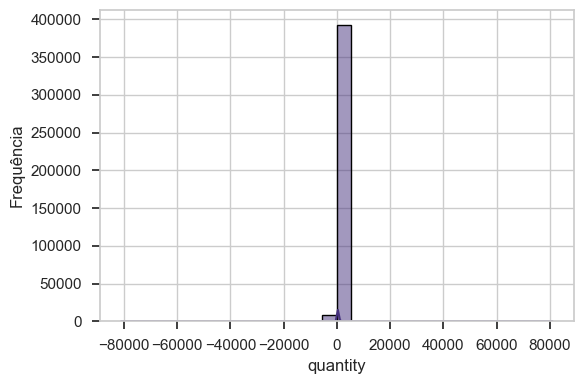

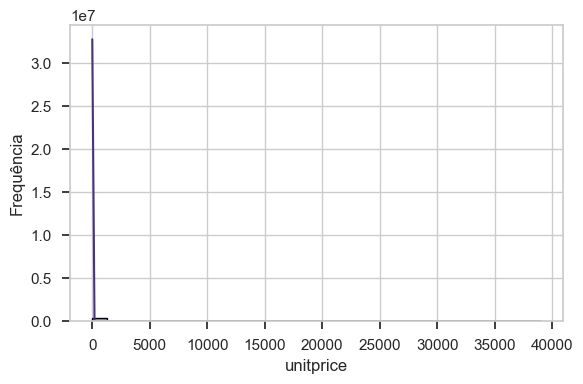

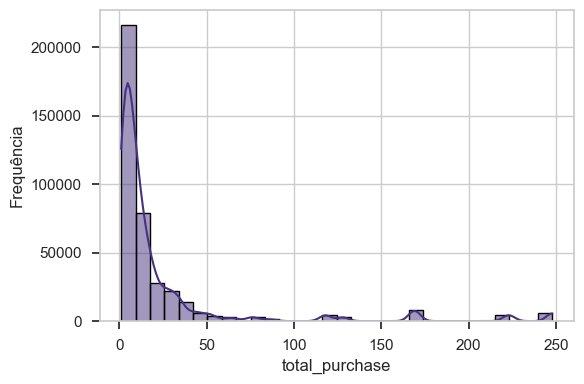

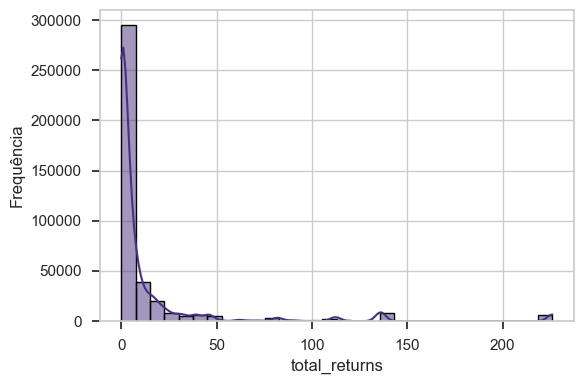

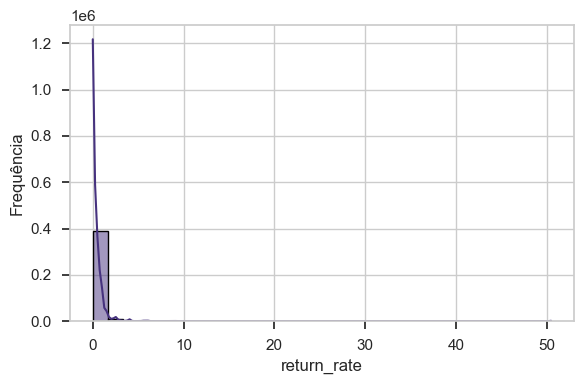

In [38]:
numerical_cols = df_.select_dtypes(include=['number']).columns #only numerical columns

for col in numerical_cols: 
    plt.figure(figsize=(6, 4)) #new fig for each hist plot
    sns.histplot(data=df_, x=col, bins=30, kde=True)
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.tight_layout()
    plt.grid(True)
    plt.show()

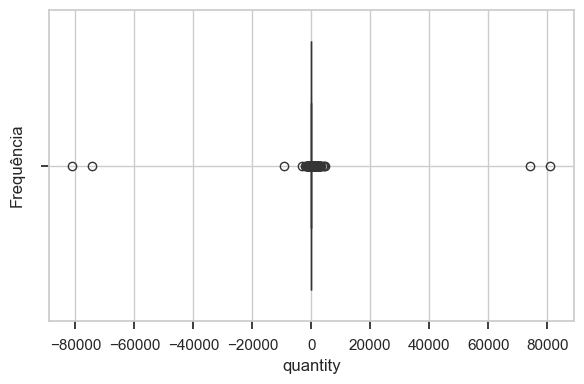

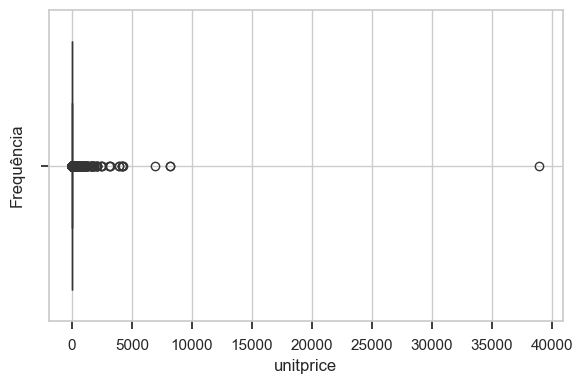

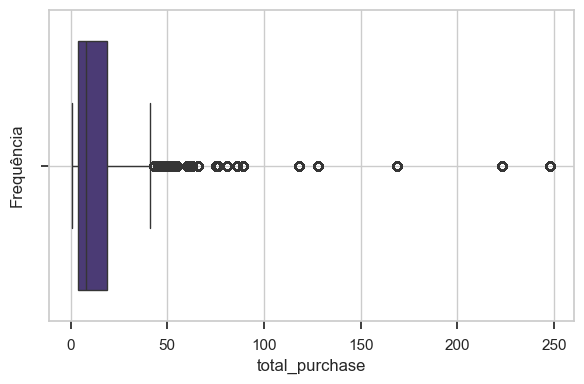

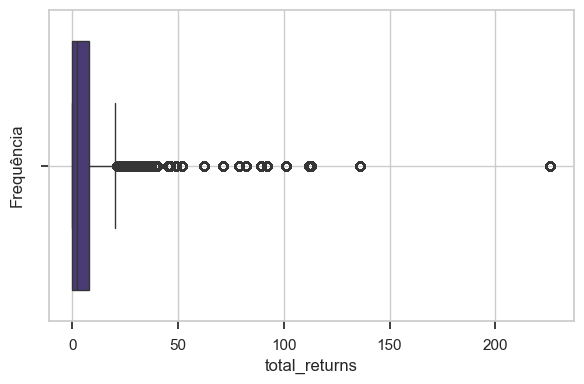

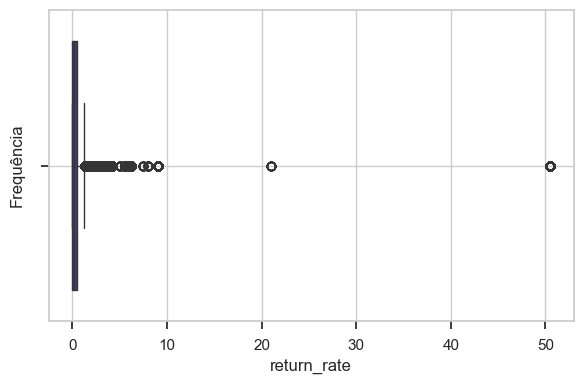

In [39]:
for col in numerical_cols: 
    plt.figure(figsize=(6, 4)) #new fig for each hist plot
    sns.boxplot(data=df_, x=col)
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.tight_layout()
    plt.grid(True)
    plt.show()

In [40]:
#comparison_report = sv.analyze(df_) #sv.analyze for just one df, sv.compare for two dfs (if it's the case possible comparison with target_feat)
#comparison_report.show_notebook()

**Interpretação:**

Analisando os gráficos de distribuição já conseguimos identificar que existem outliers:
* Existem clientes que fazem muitas compras, mais de 100 compras por ano 
* Existem clientes com uma taxa de retorno muito alta acima de 20% e com mais de 50 retornos por ano
* Existem outliers muito altos em quantidade e preço unitário, provavelmente um erro no registro que gerou retorno, pois no boxplot da coluna quantidade percebe-se que há outliers positivos e negativos na mesma proporção


##### Análise de relação entre variáveis e featuring engineering

##### Matriz de Correlação (Relação entre Variáveis Numéricas)

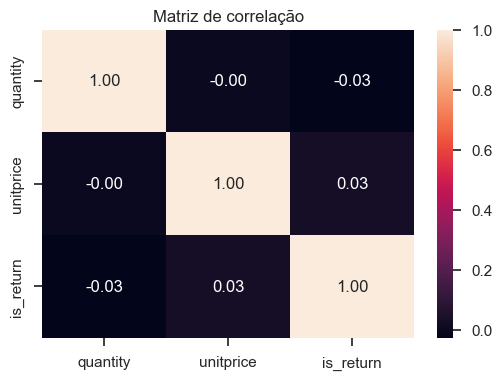

In [41]:
corr_matrix = df_[['quantity', 'unitprice', 'is_return']].corr()

#plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.title('Matriz de correlação')
plt.show()

##### Comparação entre Compradores que Devolvem vs. Não Devolvem

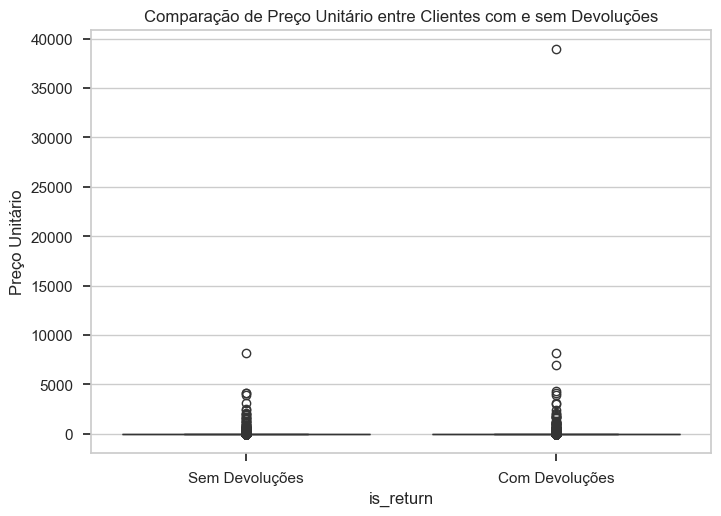

In [42]:
sns.boxplot(x=df_['is_return'], y=df_['unitprice'])
plt.title("Comparação de Preço Unitário entre Clientes com e sem Devoluções")
plt.xticks([0, 1], ['Sem Devoluções', 'Com Devoluções'])
plt.ylabel("Preço Unitário")
plt.show()

Aparentemente quem faz mais devoluções compram produtos um pouco mais caros 

##### Analisando Total gasto por clientes

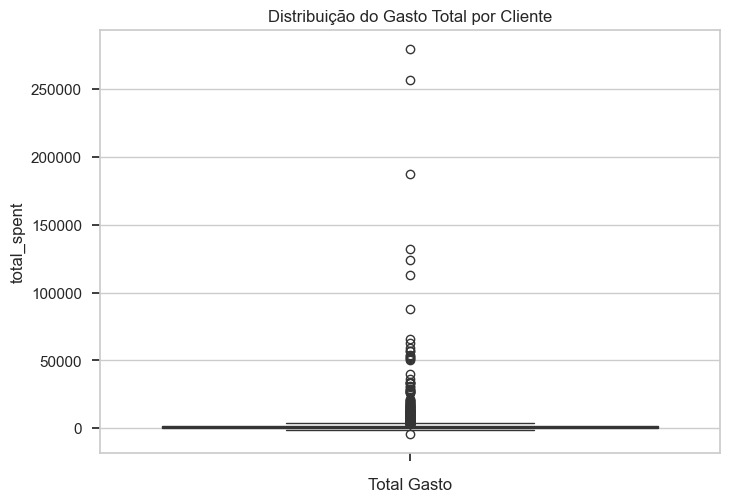

In [43]:
#total spent by client
df_['total_spent'] = df_['quantity'] * df_['unitprice']

customer_summary = df_.groupby('customerid').agg(
    total_spent=('total_spent', 'sum'),
    total_purchases=('invoiceno', 'nunique'),
    total_returns=('is_return', 'sum')
)

# Plot
sns.boxplot(customer_summary['total_spent'])
plt.title("Distribuição do Gasto Total por Cliente")
plt.xlabel("Total Gasto")
plt.show()


A maioria dos clientes gastam pouco, porém já foi identificado que há clientes de alto valor (High-Value Customers)

##### Mais featuring engineering de acordo com objetivo 

* No gráfico anterior foi criado a feature 'total_spent' que será útil para a métrica Monetary do RFM 
* Também irei criar ticket médio por cliente isso pode ajudar a segmentar clientes premium vs. clientes econômicos.
* Também irei tempo desde a última compra (métrica Recency RFM) que ajuda a identificar clientes ativos vs inativos

In [25]:
df_.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,is_return,total_purchase,total_returns,return_rate,return_category,total_spent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0,False,35,12,0.342857,many returns,15.30
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0,False,35,12,0.342857,many returns,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0,False,35,12,0.342857,many returns,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0,False,35,12,0.342857,many returns,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0,False,35,12,0.342857,many returns,20.34


In [53]:
print(df_['total_spent'].quantile(0.99))

201.60000000000002


In [ ]:
#Average Ticket per Customer and average ticket of the shop 
df_['avg_order_value'] = df_['total_spent'] / df_['total_purchase']

In [ ]:
#Recency metric: fiding last purchase in days
max_date = df_['invoicedate'].quantile(0.95)

recency_per_customer = df_.groupby('customerid')['invoicedate'].max().reset_index()
recency_per_customer['recency'] = (max_date - recency_per_customer['invoicedate']).dt.days

df_ = df_.merge(recency_per_customer[['customerid', 'recency']], how='left', on='customerid') #merge only customerid and recency 

df_.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,is_return,total_purchase,total_returns,return_rate,return_category,total_spent,avg_order_value,recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0,False,35,12,0.342857,many returns,15.30,0.437143,301
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0,False,35,12,0.342857,many returns,20.34,0.581143,301
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0,False,35,12,0.342857,many returns,22.00,0.628571,301
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0,False,35,12,0.342857,many returns,20.34,0.581143,301
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0,False,35,12,0.342857,many returns,20.34,0.581143,301


Data set completo

#### 5. Análise RFM

##### Cálculo de métricas e criação de perfis 
Temos que calcular três métricas principais para cada cliente:
* Recency (R) → Dias desde a última compra
* Frequency (F) → Número total de compras
* Monetary (M) → Gasto total

Já temos a coluna recency, então agora calculamos frequency e monetary

In [28]:
#calculating rfm metrics
rfm = df_.groupby('customerid').agg(
    recency=('recency', 'min'),
    frequency=('invoiceno', 'nunique'), #number of purchases
    monetary=('total_spent', 'sum')  
).reset_index().sort_values(by='monetary')

**Quartis RFM:**
Decidi por transformar as métricas RFM em scores de 1 a 4 baseado em quartis com número aproximado de clientes em cada um deles
* Recency (quanto menor, melhor): Menor valor recebe nota 4, maior recebe 1
* Frequency & Monetary (quanto maior, melhor): Maior valor recebe nota 4, menor recebe 1

In [29]:
#defining quartiles
rfm['r_quartile'] = pd.qcut(rfm['recency'], q=4, labels=[4, 3, 2, 1]) #lowest values (in the case of recency is the best), gain 4 points e go for group 4
rfm['f_quartile'] = pd.qcut(rfm['frequency'].rank(method='first'), q=4, labels=[1, 2, 3, 4]) #lowest values (in this case the worst), gain 1 point e go for group 1, high values (best) go for 4
rfm['m_quartile'] = pd.qcut(rfm['monetary'], q=4, labels=[1, 2, 3, 4])

#rank(method='first') used because data was with huge amount of identical values

###### Note sobre código acima:

<details>
  <summary>Clique para expandir</summary>

*Porque usar qcut ao invés de cut nesse caso?*

Porque o objetivo era dividir os clientes em quartis iguais com aproximadamente o mesmo número de clientes em cada grupo (25% dos clientes em cada label). Como temos três métricas com escalas diferentes, pode ser que em algumas delas os dados estejam muito concentrados em certos valores, (exemplo: muitos clientes fazem apenas 1 ou 2 compras), sendo assim os grupos podem ficar desbalanceados gerando problemas no futuro calculo de RFM score
* ✅ qcut() → Divide os clientes de forma equilibrada (quartis)
* ❌ cut() → Divide os clientes em faixas fixas (pode gerar grupos desbalanceados)

*Porque foi usado rank antes de qcut na coluna frequency?*

Coluna frequency estava com muitos valores iguais, fazendo com que qcut tenha valores duplicados na borda dos bins (ponto de corte), pontos de corte identicos levam ao erro. 
O método rank() atribui uma posição única a cada valor, mesmo que eles sejam iguais. Isso evita que os limites dos bins sejam duplicados. Rank(method='first')
Ordena os valores (do menor para o maior), mesmo os repetido usando a ordem em que aparecem nos dados. 

Agora, quando pd.qcut() é aplicado nos ranks, e não há mais valores duplicados pois cada valor tem um rank único. Mantém a divisão em quartis e Preserva a ordem original: Valores maiores ainda receberão labels maiores (4 = melhor).
</details>





##### Score RFM

In [30]:
#RFM score
rfm['rfm_score'] = rfm['r_quartile'].astype(int) + rfm['f_quartile'].astype(int) + rfm['m_quartile'].astype(int)

#function to classify based on RFM score
def classify_customers(row):
    """Receiving each row of the rfm DataFrame as a row object
    Checking the value in the 'rfm_score' column for that specific row
    Returning a customer segment based on that value
    The result is stored in a new column called 'segment'
    """
    if row['rfm_score'] >= 10: 
        return 'vip customer'
    elif row['rfm_score'] >= 7:
        return 'regular customer'
    elif row ['rfm_score'] >=5: 
        return 'occasional customer'
    else:
        return 'lost customer'
    
rfm['segment'] = rfm.apply(classify_customers, axis=1) #axis=1 function is applied in each row

##### Distribuição RFM (visualização de segmentos)

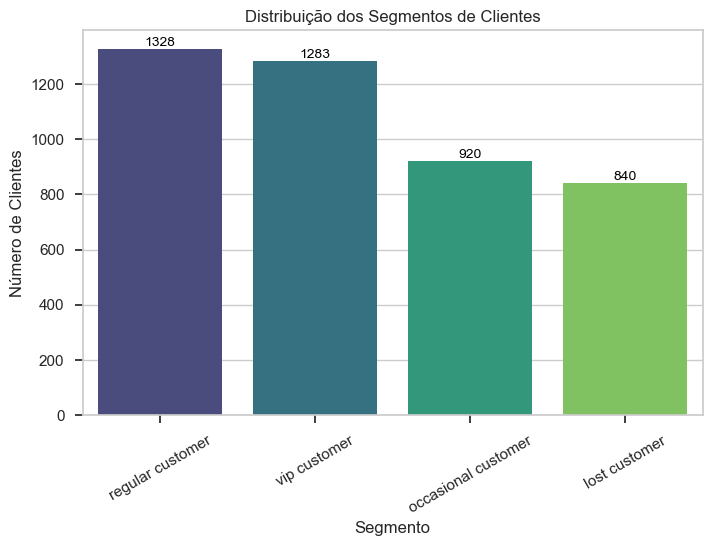

In [31]:
#plot RFM segments
segment_order = rfm['segment'].value_counts().index
plt.figure(figsize=(8,5))
ax = sns.countplot(data=rfm, x='segment', palette='viridis', order=segment_order) #ax contem todos os elementos de um subplot

for container in ax.containers: #to show labels
    ax.bar_label(container, 
                 label_type='edge', #label no topo
                 fmt='%d', #%d formata como número inteiro
                 color='black',
                 fontsize=10
    )
plt.title('Distribuição dos Segmentos de Clientes')
plt.xlabel('Segmento')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=30)
plt.show()

O maior número de clientes está na classificação regular customers, porém vip customers também número parecido, o que é um bom sinal pois são os dois melhores grupos

###### Notes do código acima

<details>
  <summary>Clique para expandir</summary>

ax recebe o subplot do matplotlib, os objetos de eixos gerados pelo seaborn nesse caso. Isso permite personalizar o subplot depois. Através dele controlamos barras, linhas rótulos, limites de eixos do subplot em questão. 
* **plt** é interface global do matplotlib (funciona bem para gráficos simples)
* **ax** representa um subplot específico (mais flexivel), necessário para gráficos complexos ou multiplos subplots 
</details>


#### 6. Treinamento de modelo de segmentação mais robusto K-means

##### Pré processamento para modelagem (Seleção de variavéis e normalização de escala de valores)

In [32]:
#avg_order_value before was by item, rfm df is aggregated by customer 
#Its necessary agragate avg_order_value by customerid before merging 
avg_order_value = df_.groupby(['customerid', 'invoiceno'])['avg_order_value'].sum()

#now agragated by customer 
avg_order_value_ = avg_order_value.groupby('customerid').mean()

#drop old avg_order_value column (by item)
df_.drop(labels=['avg_order_value'], axis=1, inplace=True)

#merge new avg_order_value by customer
df_= df_.merge(avg_order_value_, on='customerid', how='left')

#adding return_rate e avg_order_value to rfm 
df_extra = df_.groupby('customerid').agg({'return_rate':'mean', 'avg_order_value':'mean'}).reset_index()

rfm = rfm.merge(df_extra, how='left', on='customerid')

Adicionei ticket médio por cliente e taxa de retorno para uma modelagem mais robusta, no proximo passo como estamos lidando com variáveis de escalas diferentes, a normalização é fundamental

In [33]:
rfm_clustering = rfm[['recency', 'frequency', 'monetary', 'return_rate', 'avg_order_value']].copy()

scaler = MinMaxScaler()
rfm_clustering_scaled = scaler.fit_transform(rfm_clustering)

###### Notes sobre o código acima

<details>
  <summary>Clique para expandir</summary>

MinMaxScaler: Escala os valores para um intervalo fixo (0 a 1 por padrão). Mantém a forma original da distribuição dos dados. (Nossos dados não são normalmente distribuidos e algumas variáveis tem valores muito diferentes em relação as outras)

StandardScaler: Centraliza os dados com média 0 e desvio padrão 1. Pode distorcer a escala original dos dados se não forem dados normalmente distribuidos (ex: melhor no caso regressão linear, PCA, redes neurais).
* MinMaxScaler → Melhor para K-Means, mantém a relação entre os dados.
* StandardScaler → Melhor para modelos que assumem distribuição normal.
</details>


##### Escolhendo o melhor K (número ideal de clusters) método Ward e cotovelo 

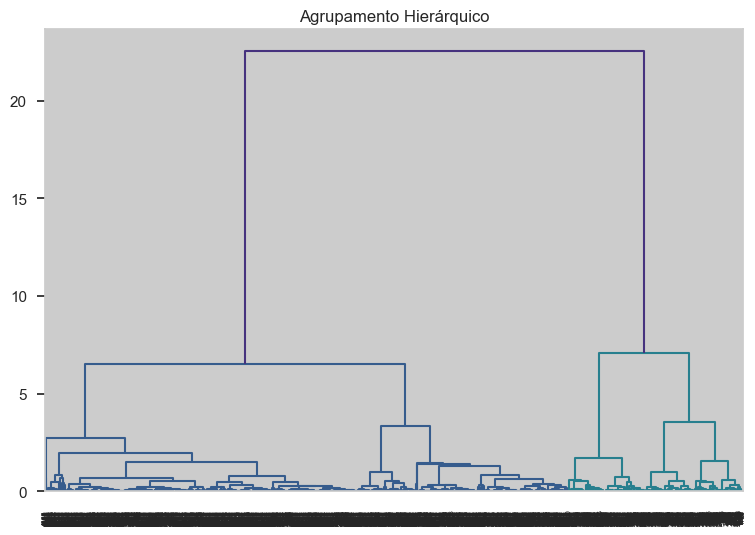

In [34]:
#Ward method 
linked = linkage(rfm_clustering_scaled, method='ward')

#plot dendrogram
plt.figure(figsize=(9,6))
dendrogram(linked, orientation='top')
plt.title('Agrupamento Hierárquico')
plt.show()

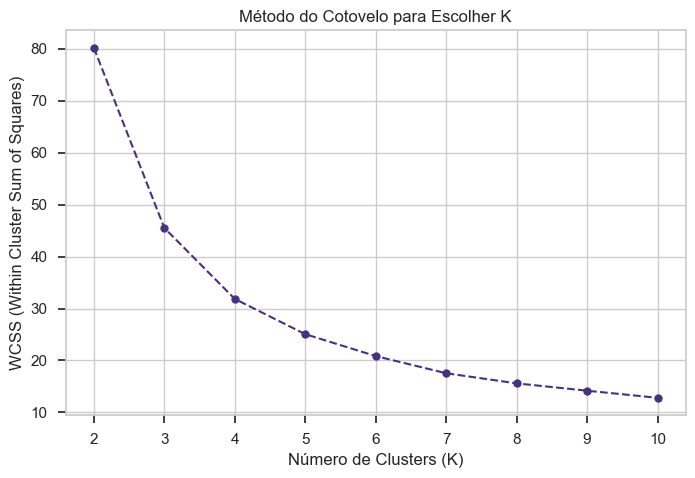

In [35]:
#Elbow method 
wcss = []  # Within Cluster Sum of Squares (Soma dos Quadrados Intra-Cluster), lista para armazenar a soma dos erros internos

for k in range(2, 11):  # Testing from 2 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) #random_state garante reprodutibilidade para novo teste, n_init=10 executa o algoritmo 10 vezes com diferentes iniciações
    kmeans.fit(rfm_clustering_scaled)
    wcss.append(kmeans.inertia_)  #salvando somente innertia soma das distâncias intra-cluster, mede a compactação dos clusters (lowest, best)

# Plotando o gráfico do cotovelo
plt.figure(figsize=(8,5))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.title('Método do Cotovelo para Escolher K')
plt.show()

###### Notes sobre código acima:

<details>
  <summary>Clique para expandir</summary>

* WCSS: Medida de quão compactos são os clusters
* Método do Cotovelo: Procura o ponto onde adicionar mais clusters não melhora significativamente o modelo, o "ponto do cotovelo" (onde a diminuição do WCSS começa a se estabilizar) indica o k ideal
</details>


Método Ward não funcionou muito bem e ainda não consegui ter certeza sobre o melhor número de grupos usando o método cotovelo manualmente, irei recorrer ao método rápido do YellowBrick:

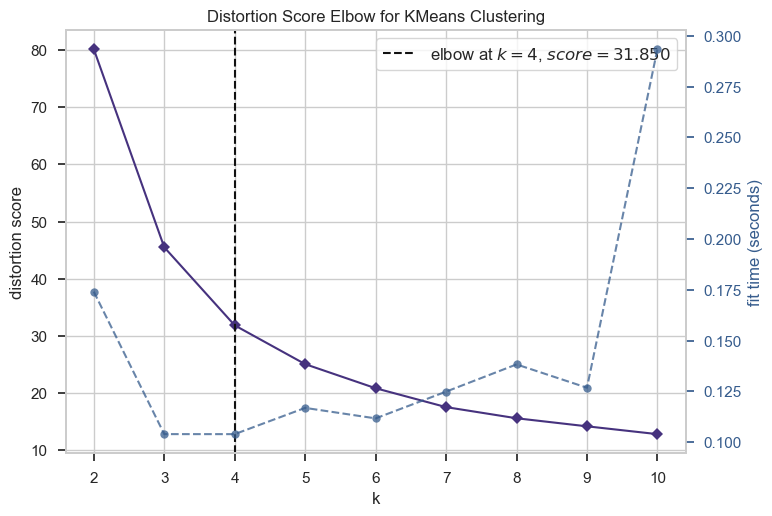

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=10, random_state=42), k=(2, 11))

In [36]:
# Using the quick method Yellow Brick
kelbow_visualizer(KMeans(random_state=42), rfm_clustering_scaled, k=(2,11))

Número ideal são 4 grupos

##### Rodando K-Means com o melhor K

In [37]:
k_optimal = 4

kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)

#new colum with labels in original rfm from kmeans predict from (rfm_scaled) 
rfm_clustering['cluster'] = kmeans.fit_predict(rfm_clustering_scaled)

##### Interpretando e validando os clusters

In [38]:
print(rfm_clustering.groupby('cluster').mean())
print()
print('Silhouette_score: {:.2f}'.format(silhouette_score(rfm_clustering_scaled, rfm_clustering['cluster'])))

            recency  frequency     monetary  return_rate  avg_order_value
cluster                                                                  
0         17.560222   7.731426  3088.377970     0.288010       104.699791
1        189.451356   2.228070   585.465871     0.252106       177.844419
2        308.851779   1.535573   358.197747     0.289663       216.761292
3         79.296919   3.042017   968.878807     0.238750       211.787092

Silhouette_score: 0.53


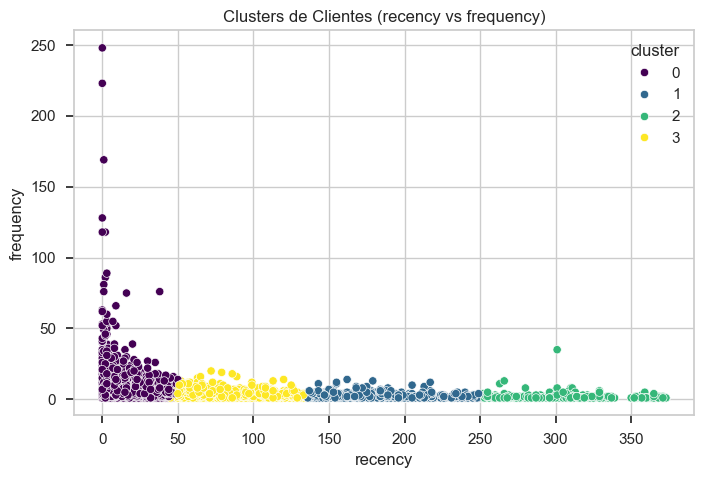

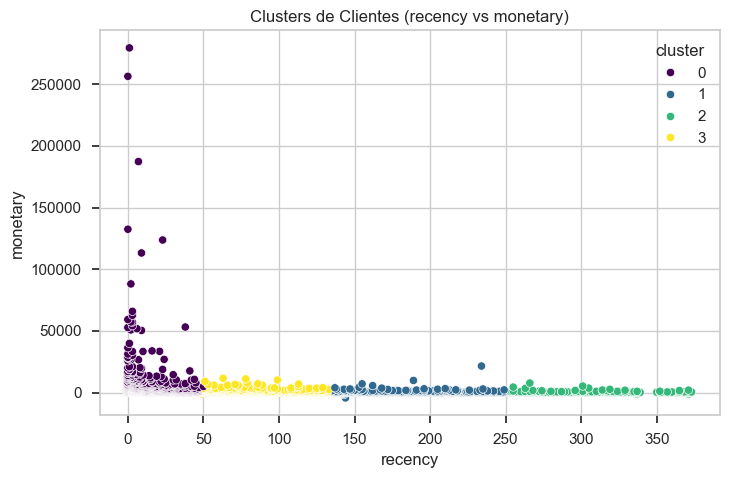

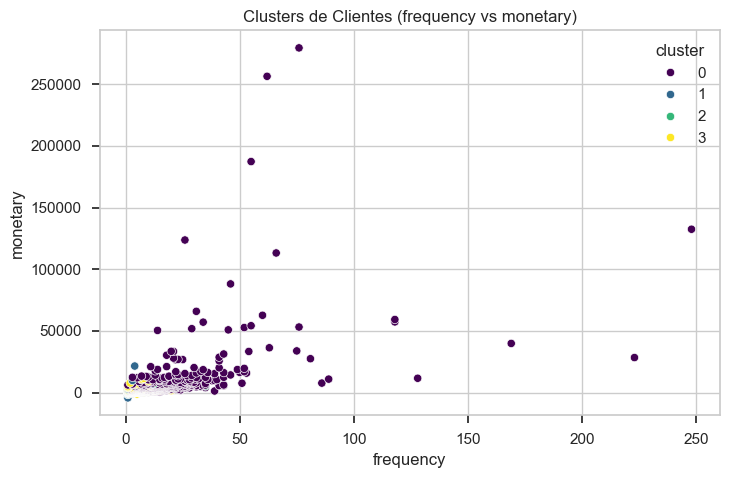

In [39]:
#list of columns to compare
colunas =['recency', 'frequency', 'monetary']

for col1, col2 in combinations(colunas, 2): # Create combination of columns pairs
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=rfm_clustering[col1], y=rfm_clustering[col2], hue=rfm_clustering['cluster'], palette='viridis')
    plt.title(f'Clusters de Clientes ({col1} vs {col2})')
    plt.show()

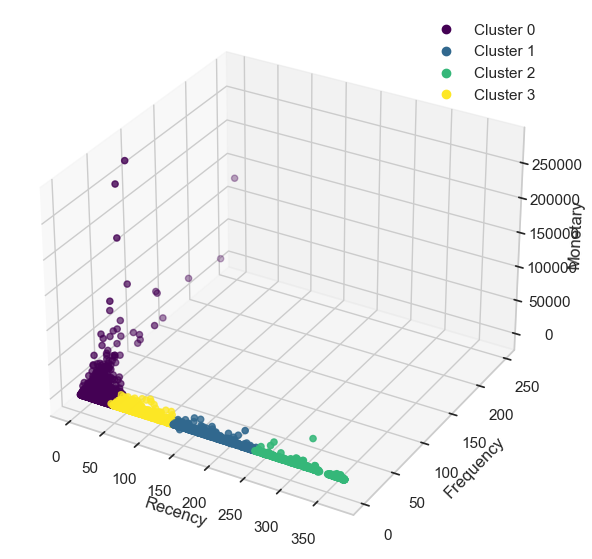

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

scatter_plot = ax.scatter(
    rfm_clustering['recency'], 
    rfm_clustering['frequency'], 
    rfm_clustering['monetary'], 
    c=rfm_clustering['cluster'], 
    cmap='viridis'
)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

# Cluster labels
clusters = sorted(rfm_clustering['cluster'].unique())
legend_labels = [f'Cluster {i}' for i in clusters]

# legend
ax.legend(
    handles=scatter_plot.legend_elements()[0],
    labels=legend_labels,
)

plt.show()

**Interpretação**

Tirando o grupo 0 (Lilás) fica dificil diferenciar os outros grupos no quesito frequência, a principio essa seria a ordem dos grupos:
* Grupo 0 (Lilás) = Clientes VIP
* Grupo 3 (Amarelo) = Clientes Regulares 
* Grupo 1 (Azul) = Clientes Ocasionais 
* Grupo 2 (Verde) = Clientes Perdidos

##### Nova distribuição dos grupos

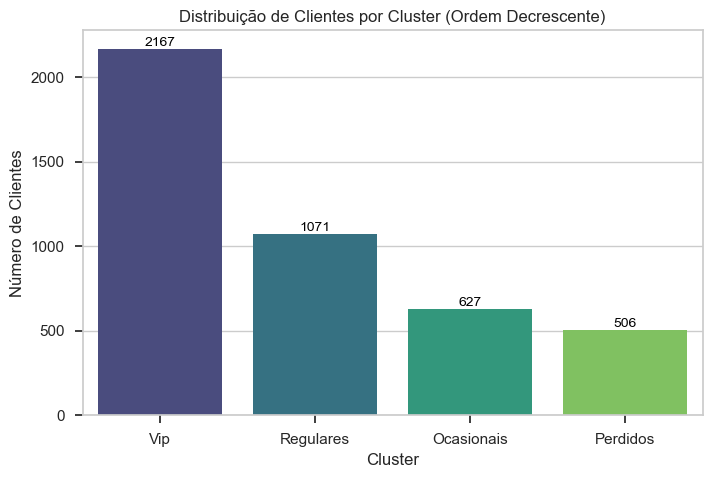

In [ ]:
# Cluster counts ascending False
cluster_counts = rfm_clustering['cluster'].value_counts().sort_values(ascending=False)

# Crie o gráfico com os dados explícitos (evitando conflitos de ordem)
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x=cluster_counts.index.astype(str),
    y=cluster_counts.values,
    palette='viridis',
)

cluster_labels = {
    0: 'Vip',
    1: 'Ocasionais',
    2: 'Perdidos',
    3: 'Regulares'
}

# Custom xticks
plt.xticks(
    ticks=range(len(cluster_counts)), #positions of xticks 
    labels=[cluster_labels.get(x) for x in cluster_counts.index] #list comprehesion loop for in cluster index, dict get each index
)

# Adicione os rótulos das barras
for container in ax.containers:
    ax.bar_label(
        container,
        label_type='edge',
        fmt='%d',
        color='black',
        fontsize=10
    )

plt.xlabel('Cluster')
plt.ylabel('Número de Clientes')
plt.title('Distribuição de Clientes por Cluster (Ordem Decrescente)')
plt.show()

* 0, Vip: Maior com 2167 Clientes
* 3, Regulares: 1071 Clientes 
* 1, Ocasionais: 627 Clientes 
* 2, Perdidos: Menor com 506 Clientes 

#### 7. Análise de clusters criados

##### Distribuição dos dados por perfil
Box plot de cada característica rfm (coluna rfm_clustering) para diferenciar entre clusters 

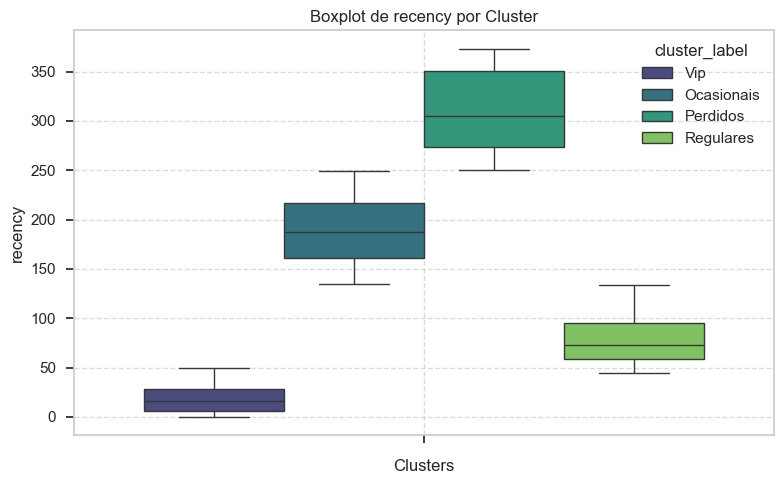

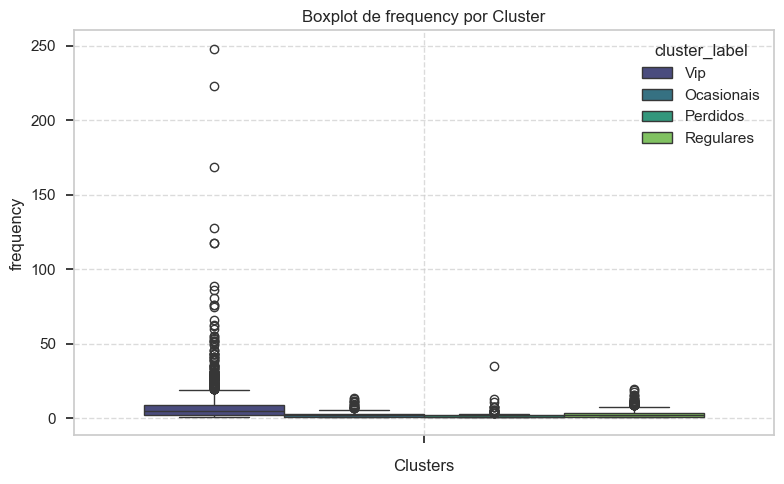

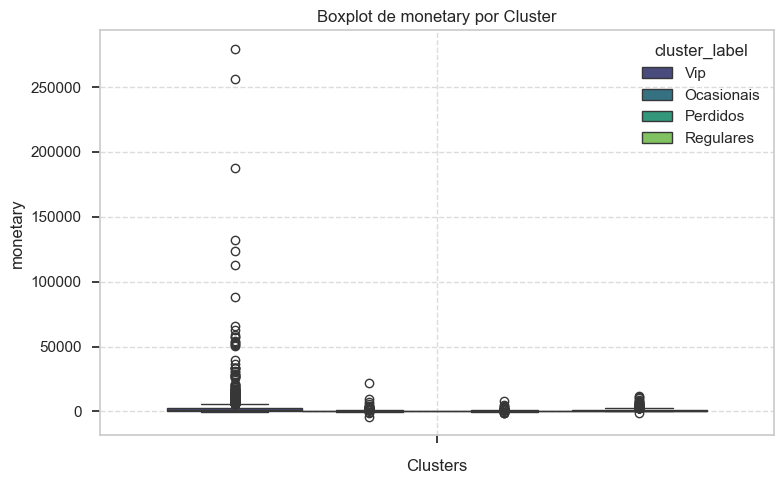

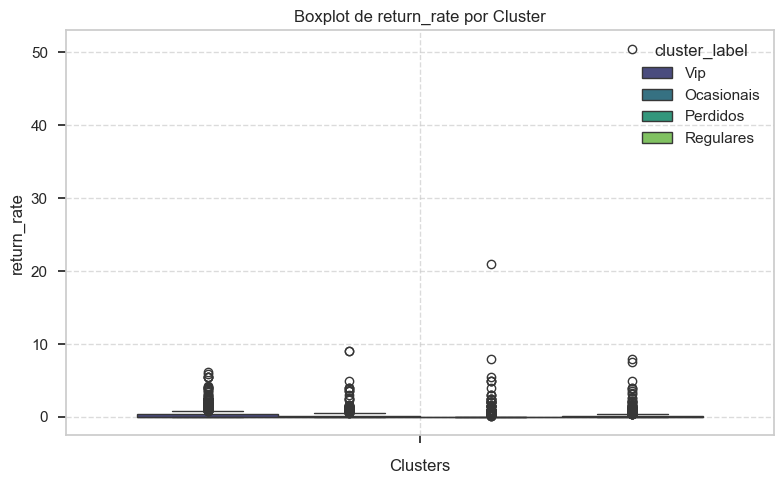

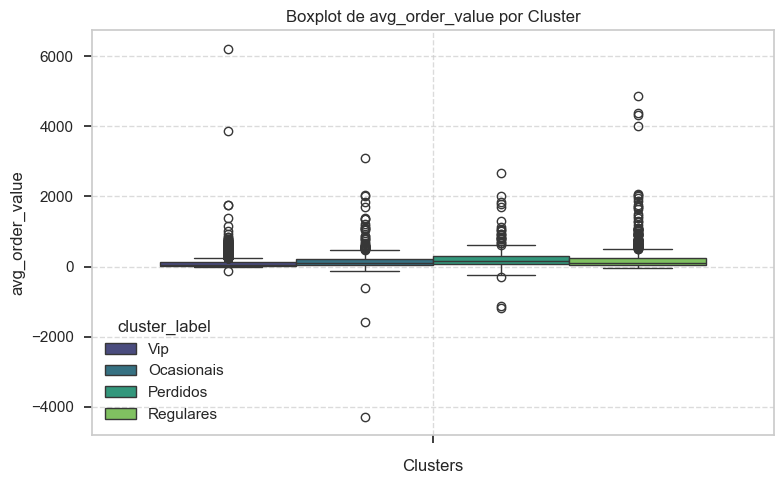

In [ ]:
#New colum with cluster labels 
rfm_clustering['cluster_label'] = rfm_clustering['cluster'].map(cluster_labels) 
#replaces each numeric value of 'cluster' with its corresponding label in the dictionary.

#plot
for col in [col for col in rfm_clustering.columns if col not in ['cluster', 'cluster_label']]: 
    plt.figure(figsize=(8, 5)) 
    sns.boxplot(
        data=rfm_clustering, 
        y=col, 
        hue='cluster_label', 
        palette='viridis', 
        hue_order=['Vip', 'Ocasionais', 'Perdidos', 'Regulares']) #pallete applicable as hue_order
    plt.xlabel('Clusters')
    plt.title(f'Boxplot de {col} por Cluster') 
    plt.ylabel(col)
    plt.tight_layout()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

Grupo 0 acaba distorcendo os gráficos, por ser um grupo com valores muito bons em relação aos outros grupos, vou fazer novos gráficos sem o grupo 0 

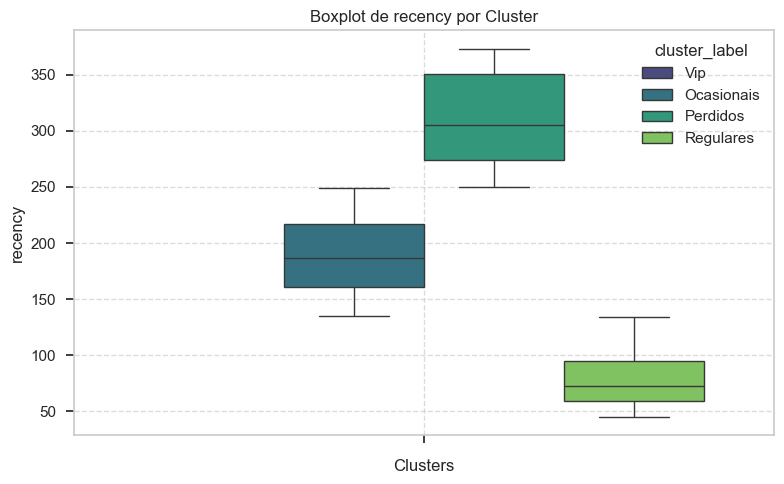

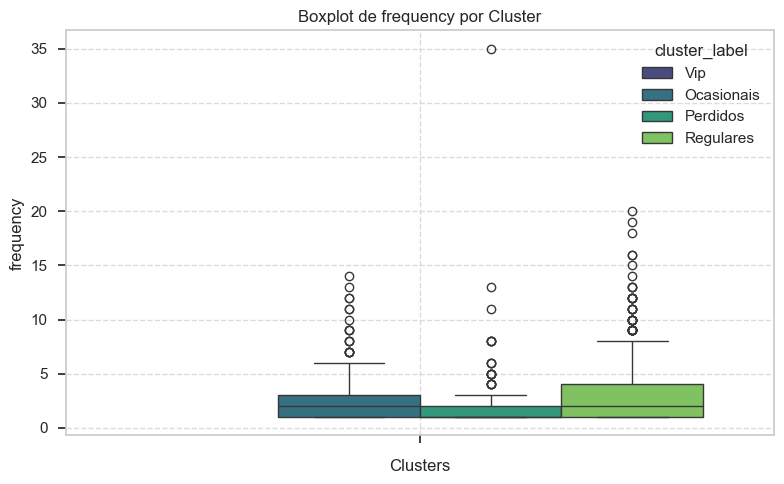

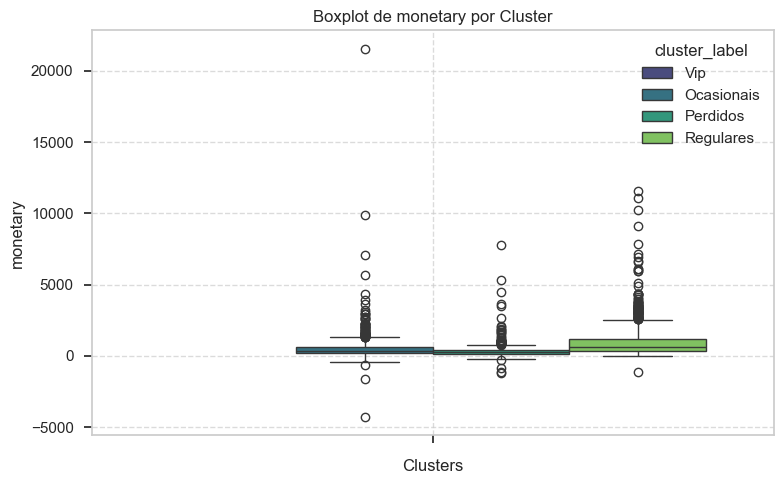

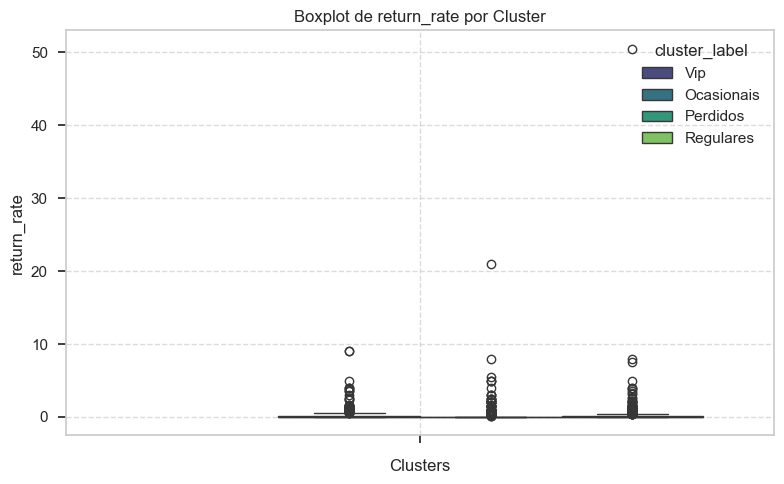

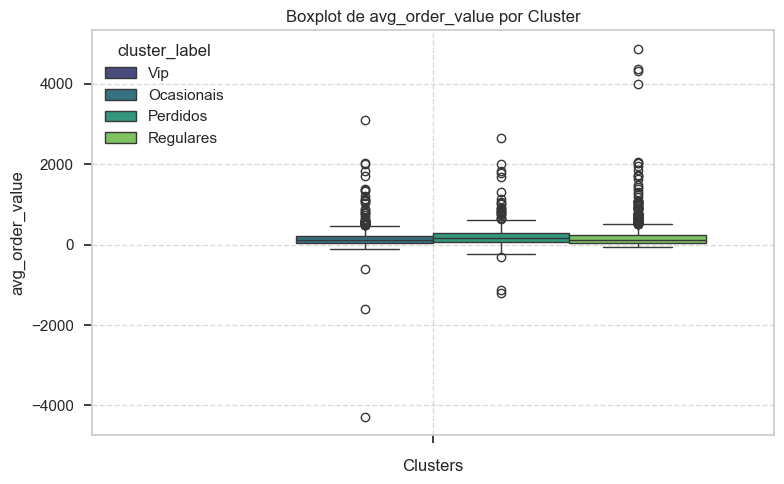

In [ ]:
rfm_filtered = rfm_clustering[rfm_clustering['cluster'] != 0]

for col in [col for col in rfm_filtered.columns if col not in ['cluster', 'cluster_label']]: 
    plt.figure(figsize=(8, 5)) 
    sns.boxplot(data=rfm_filtered, y=col, hue='cluster_label', palette='viridis', hue_order=['Vip', 'Ocasionais', 'Perdidos', 'Regulares'])
    plt.xlabel('Clusters')
    plt.title(f'Boxplot de {col} por Cluster') 
    plt.ylabel(col)
    plt.tight_layout()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

Agora podemos ter uma visualização um pouco melhor onde também conseguimos diferenciar entre os grupos Regulares, Ocasionais e Perdidos.

**Listando em ordem decresente os grupos em cada característica:**
* Recency: Vip > Regulares > Ocasionais > Perdidos
* Frequency: Vip > Regulares > Ocasionais > Perdidos  
* Monetary: Vip > Regulares > Ocasionais > Perdidos  
* Return Rate (característica negativa): Perdidos > Ocasionais > Regulares > Vip 
* Average Order Value: Vip > Regulares > Ocasionais > Perdidos  

##### Análise de diferença estatisticamente significativa para cada variável entre os grupos (ANOVA)
Hipótese Nula (H₀): As médias dos grupos são iguais (não há diferença estatisticamente significativa).

Hipótese Alternativa (H₁): Pelo menos um grupo tem uma média diferente dos outros.

Como o K-Means gerou vários clusters, o ideal é usar o teste ANOVA ao invés de Testes t entre pares de clusters. Assim compararamos mais de dois clusters ao mesmo tempo para diferentes variaveis. O objetivo aqui é verificar se variabilidade entre os grupos é muito maior do que a variabilidade dentro dos própios grupos, se isso for verdade o teste indicará uma diferença estatisticamente significativa. Portanto os grupos foram separados com distancias consideravéis entre si e alta similaridade entre os menbros do mesmo grupo

In [ ]:
# Empty dict to save results
anova_results = {}

# Teste ANOVA para cada variável relevante
for col in [col for col in rfm_clustering.columns if col not in ['cluster', 'cluster_label']]: #1 for each column except 'cluster' and 'cluster_label'
    grupos = [rfm_clustering[rfm_clustering['cluster'] == k][col] for k in rfm_clustering['cluster'].unique()] 
    #2 for each cluster(k) in list of unique clusters, we filter only the data from that k for feature variable[col in first loop](return Series object), then create a list 'groups' containing the subsets of data from each k for each col
    anova_results[col] = stats.f_oneway(*grupos) 
    #saving the ANOVA test result in the anova_results dictionary, using col as the key.
    #using *groups, each of those groups is treated as a separate argument to stats.f_oneway().

#Iterates through the anova_results dictionary and prints the p-values ​​for each variable analyzed.
for feature, result in anova_results.items():
    print(f"{feature}: p-valor = {result.pvalue:.5f}")

recency: p-valor = 0.00000
frequency: p-valor = 0.00000
monetary: p-valor = 0.00000
return_rate: p-valor = 0.57089
avg_order_value: p-valor = 0.00000


###### Notes sobre código acima:

<details>
  <summary>Clique para expandir</summary>
  
Como interpretar o resultado?
Se o p-valor < 0.05, há diferenças estatisticamente significativas entre os grupos para aquela variável.
Se o p-valor >= 0.05, não há evidências suficientes para dizer que os clusters têm médias diferentes.

Cálculo do F-Statistic
A ANOVA compara a variação entre os grupos com a variação dentro dos grupos e calcula um número chamado F-Statistic.

Se a variabilidade entre os grupos for muito maior do que a variabilidade dentro dos grupos, o teste indicará uma diferença estatisticamente significativa.
</details>



**Interpretação:**

Com exceção da taxa de retorno, em todos os outros aspectos a hipótese nula foi rejeitada, significando que há uma diferença estatisticamente significativa entre os grupos

Se a taxa de devolução não diferencia os grupos, talvez não seja útil no modelo.

#### 7. Conclusão e recomendações 

Como proposto foi realizada uma segmentação dos clientes com base na análise RFM (Recency, Frequency, Monetary) e foi aplicado o algoritmo de clustering K-Means para identificar padrões de comportamento dos consumidores. Os resultados revelaram quatro grupos distintos de clientes:

* Cluster 0 - VIP (2167 clientes): Clientes mais valiosos, que compram frequentemente, gastam mais e fazem pedidos de maior valor médio.

* Cluster 3 - Regulares (1071 clientes): Clientes que compram com boa frequência, mas gastam menos que os VIPs.

* Cluster 1 - Ocasionais (627 clientes): Compram esporadicamente e possuem um gasto médio intermediário.

* Cluster 2 - Perdidos (506 clientes): Clientes que não compram há muito tempo e gastam pouco.

A análise estatística (ANOVA) confirmou diferenças significativas entre os clusters para as variáveis recency, frequency, monetary e avg_order_value, indicando que a segmentação é relevante para estratégias de marketing. No entanto, a taxa de devolução (return_rate) não apresentou diferenças significativas entre os grupos.

**Recomendações para Cada Segmento:**

1. VIP (Clientes mais valiosos):

* Estratégia: Programa de fidelidade exclusivo e ofertas personalizadas.

Ações recomendadas:

* Ofertas e descontos VIP para compras recorrentes.

* Acesso antecipado a novos produtos.

* Convites para eventos exclusivos ou experiências premium.

* Atendimento prioritário e suporte diferenciado.

2. Regulares:

* Estratégia: Incentivar maior recorrência de compras para que se tornem VIPs.

Ações recomendadas:

* Programa de recompensas progressivo baseado na frequência de compras.

* Campanhas de upsell e cross-sell com produtos relacionados.

* Descontos especiais para compras dentro de um curto espaço de tempo.

3. Ocasionais:

* Estratégia: Criar incentivos para aumentar a frequência de compras.

Ações recomendadas:

* E-mails de reengajamento com ofertas limitadas.

* Cupons de desconto personalizados com base no histórico de compras.

* Análise dos produtos mais comprados para oferecer sugestões personalizadas.

4. Perdidos:

* Estratégia: Recuperar clientes inativos e reverter possíveis motivos de churn.

Ações recomendadas:

* Campanhas de "sentimos sua falta" com ofertas especiais.

* Pesquisa de feedback para entender razões do afastamento.

* Redução de barreiras para novas compras, como frete grátis na próxima compra.

Próximos Passos:

Implementar campanhas personalizadas com base nas recomendações acima.

Monitorar a evolução dos segmentos após a implementação das estratégias.

Refinar a segmentação com base em novos dados e feedbacks.

Testar abordagens diferentes para o cluster "perdidos" e avaliar sua efetividade.